In [2]:
!pip install numpy matplotlib pandas wordcloud
!pip install plotly


In [3]:
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [4]:
file=r"C:\Users\Pavithra\Downloads\food_coded.csv"
food=pd.read_csv(file)

In [5]:
import os
print(os.getcwd())

C:\Users\Pavithra


In [7]:
food.head()

,GPA,Gender,breakfast,calories_chicken,calories_day,calories_scone,coffee,comfort_food,comfort_food_reasons,comfort_food_reasons_coded,...,soup,sports,thai_food,tortilla_calories,turkey_calories,type_sports,veggies_day,vitamins,waffle_calories,weight
0,2.4,2,1,430,NaN,315.0,1,none,we dont have comfort,9.0,...,1.0,1.0,1,1165.0,345,car racing,5,1,1315,187
1,3.654,1,1,610,3.0,420.0,2,"chocolate, chips, ice cream","Stress, bored, anger",1.0,...,1.0,1.0,2,725.0,690,Basketball,4,2,900,155
2,3.3,1,1,720,4.0,420.0,2,"frozen yogurt, pizza, fast food","stress, sadness",1.0,...,1.0,2.0,5,1165.0,500,none,5,1,900,I'm not answering this.
3,3.2,1,1,430,3.0,420.0,2,"Pizza, Mac and cheese, ice cream",Boredom,2.0,...,1.0,2.0,5,725.0,690,NaN,3,1,1315,"Not sure, 240"
4,3.5,1,1,720,2.0,420.0,2,"Ice cream, chocolate, chips","Stress, boredom, cravings",1.0,...,1.0,1.0,4,940.0,500,Softball,4,2,760,190


In [8]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125 entries, 0 to 124
Data columns (total 61 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   GPA                           123 non-null    object 
 1   Gender                        125 non-null    int64  
 2   breakfast                     125 non-null    int64  
 3   calories_chicken              125 non-null    int64  
 4   calories_day                  106 non-null    float64
 5   calories_scone                124 non-null    float64
 6   coffee                        125 non-null    int64  
 7   comfort_food                  124 non-null    object 
 8   comfort_food_reasons          123 non-null    object 
 9   comfort_food_reasons_coded    106 non-null    float64
 10  cook                          122 non-null    float64
 11  comfort_food_reasons_coded.1  125 non-null    int64  
 12  cuisine                       108 non-null    float64
 13  diet_

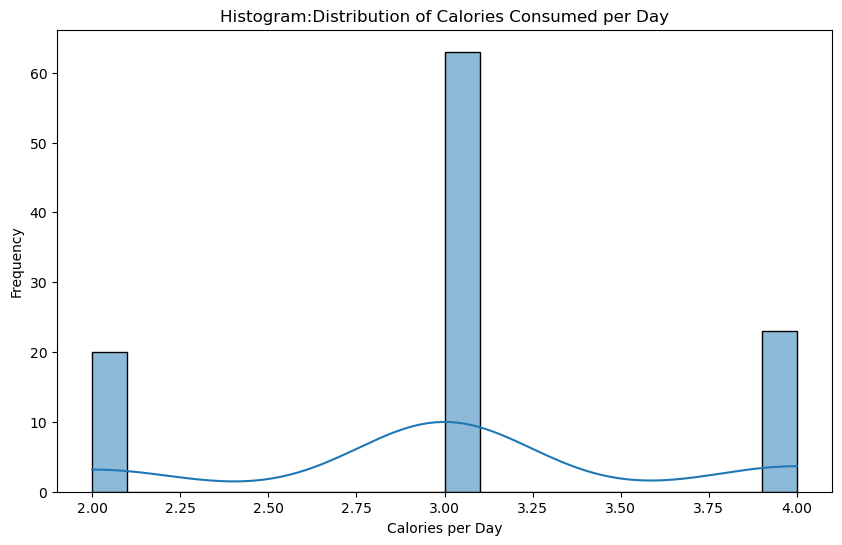

In [9]:
# 1. HISTOGRAM
plt.figure(figsize=(10, 6))
sns.histplot(food['calories_day'].dropna(), bins=20, kde=True)
plt.title('Histogram:Distribution of Calories Consumed per Day')
plt.xlabel('Calories per Day')
plt.ylabel('Frequency')
plt.show()

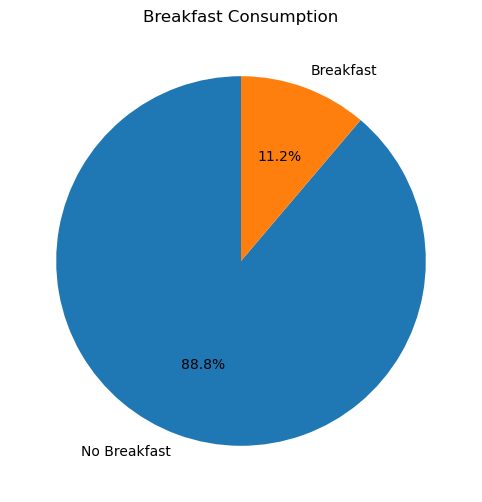

In [17]:
# 2. Pie Chart - Breakfast Consumption
breakfast_counts = food['breakfast'].value_counts()
plt.figure(figsize=(8, 6))
plt.pie(breakfast_counts, labels=['No Breakfast', 'Breakfast'], autopct='%1.1f%%', startangle=90)
plt.title('Breakfast Consumption')
plt.show()

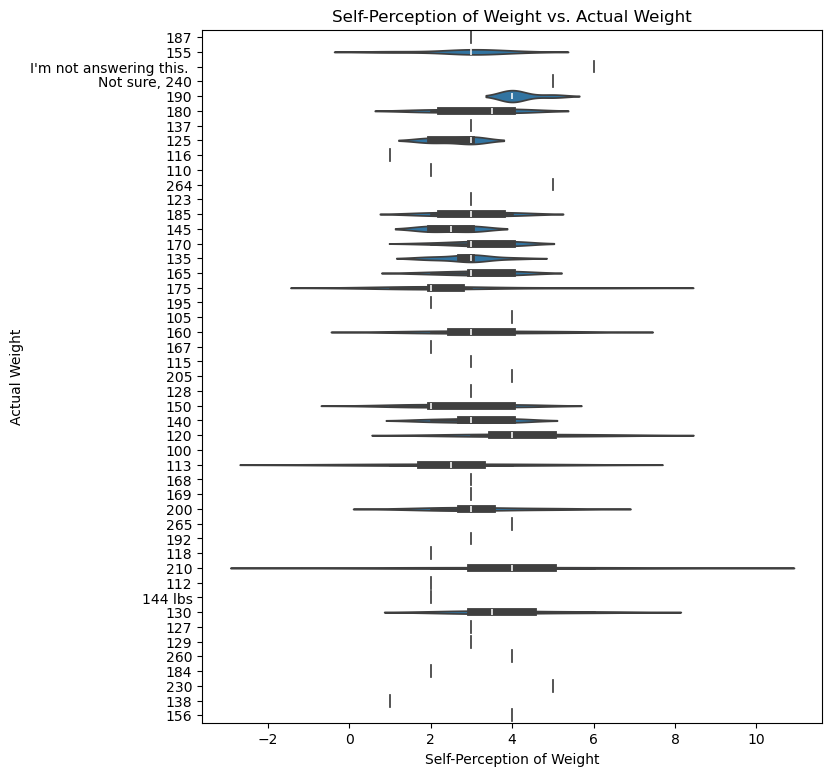

In [28]:
# 3. Violin Plot - Self-Perception of Weight vs. Actual Weight
plt.figure(figsize=(8, 9))
sns.violinplot(x='self_perception_weight', y='weight', data=food)
plt.title('Self-Perception of Weight vs. Actual Weight')
plt.xlabel('Self-Perception of Weight')
plt.ylabel('Actual Weight')
plt.show()

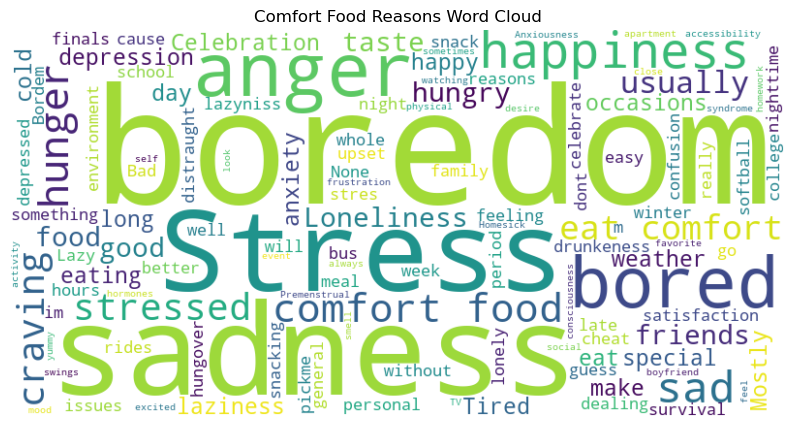

In [24]:
# 4. Word Cloud - Comfort Food Reasons
comfort_food_reasons = ' '.join(food['comfort_food_reasons'].dropna().astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(comfort_food_reasons)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Comfort Food Reasons Word Cloud')
plt.show()

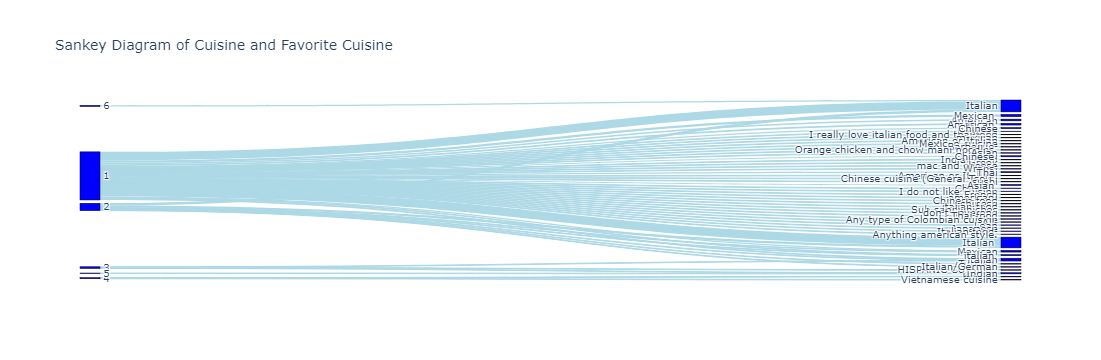

In [36]:
# 5. Sankey Diagram

food = food.dropna(subset=['cuisine', 'fav_cuisine'])

flow_data = food.groupby(['cuisine', 'fav_cuisine']).size().reset_index(name='count')

# Create lists for source, target, and value for the Sankey Diagram
sources = flow_data['cuisine'].tolist()
targets = flow_data['fav_cuisine'].tolist()
values = flow_data['count'].tolist()

# Create a mapping from category names to index
all_nodes = list(set(sources + targets))
mapping = {node: i for i, node in enumerate(all_nodes)}

# Map sources and targets to their respective indices
sources = [mapping[source] for source in sources]
targets = [mapping[target] for target in targets]

# Create the Sankey Diagram
fig = go.Figure(data=[go.Sankey(
    node=dict(
        pad=15,
        thickness=20,
        line=dict(color="black", width=0.5),
        label=all_nodes,
        color="blue"
    ),
    link=dict(
        source=sources,
        target=targets,
        value=values,
        color="lightblue"
    )
)])

fig.update_layout(title_text="Sankey Diagram of Cuisine and Favorite Cuisine", font_size=10)
fig.show()

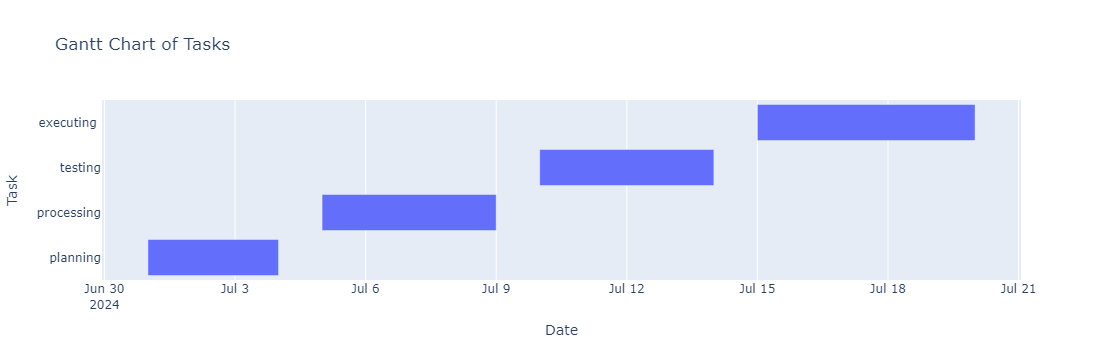

In [38]:
# 6. Gannt chart
data = {
    'Task': ['planning', 'processing', 'testing', 'executing '],
    'Start': ['2024-07-01', '2024-07-05', '2024-07-10', '2024-07-15'],
    'End': ['2024-07-04', '2024-07-09', '2024-07-14', '2024-07-20']
}

df = pd.DataFrame(data)
df['Start'] = pd.to_datetime(df['Start'])
df['End'] = pd.to_datetime(df['End'])

fig = px.timeline(df, x_start='Start', x_end='End', y='Task', title='Gantt Chart of Tasks')
fig.update_yaxes(categoryorder="total ascending")  # Optional: Order tasks by duration
fig.update_layout(xaxis_title='Date', yaxis_title='Task')
fig.show()


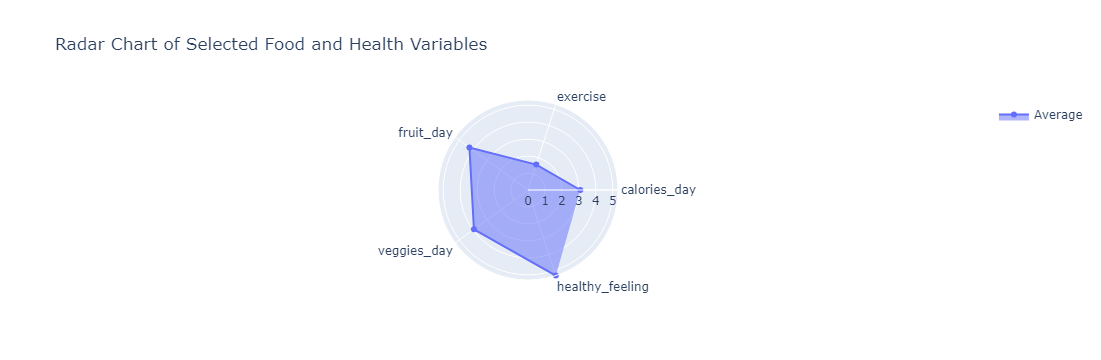

In [39]:
# 7.  radar chart
# Select the columns for the radar chart
columns = ['calories_day', 'exercise', 'fruit_day', 'veggies_day', 'healthy_feeling']

# Remove rows with missing values in the selected columns
subset = food[columns].dropna()

# Take the mean of the selected columns for plotting
data_mean = subset.mean()

# Create the radar chart
fig = go.Figure()

fig.add_trace(go.Scatterpolar(
    r=data_mean,
    theta=columns,
    fill='toself',
    name='Average'
))

fig.update_layout(
    polar=dict(
        radialaxis=dict(
            visible=True,
            range=[0, max(data_mean)]
        )),
    showlegend=True,
    title='Radar Chart of Selected Food and Health Variables'
)

fig.show() 

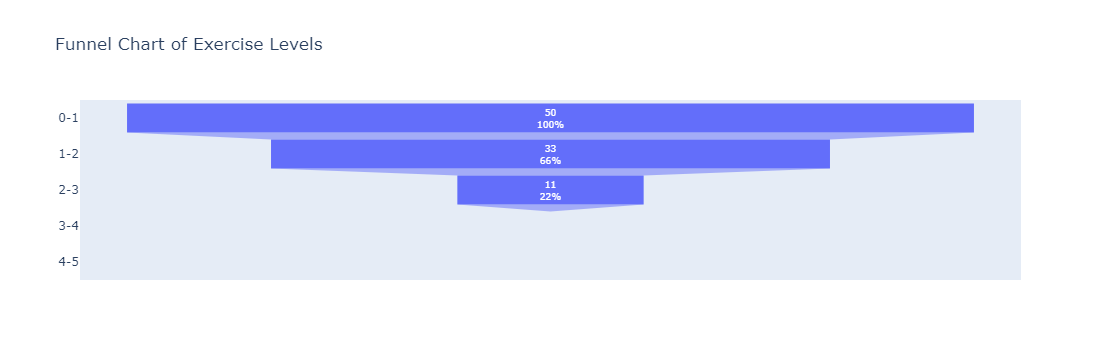

In [40]:
# 8. funnel chart

# Create bins for exercise levels
exercise_bins = pd.cut(food['exercise'].dropna(), bins=[0, 1, 2, 3, 4, 5], labels=['0-1', '1-2', '2-3', '3-4', '4-5'])

# Count the number of entries in each bin
exercise_counts = exercise_bins.value_counts().sort_index()

# Create the funnel chart
fig = go.Figure(go.Funnel(
    y = exercise_counts.index.astype(str),
    x = exercise_counts.values,
    textinfo = "value+percent initial"))

fig.update_layout(
    title='Funnel Chart of Exercise Levels'
)

fig.show()


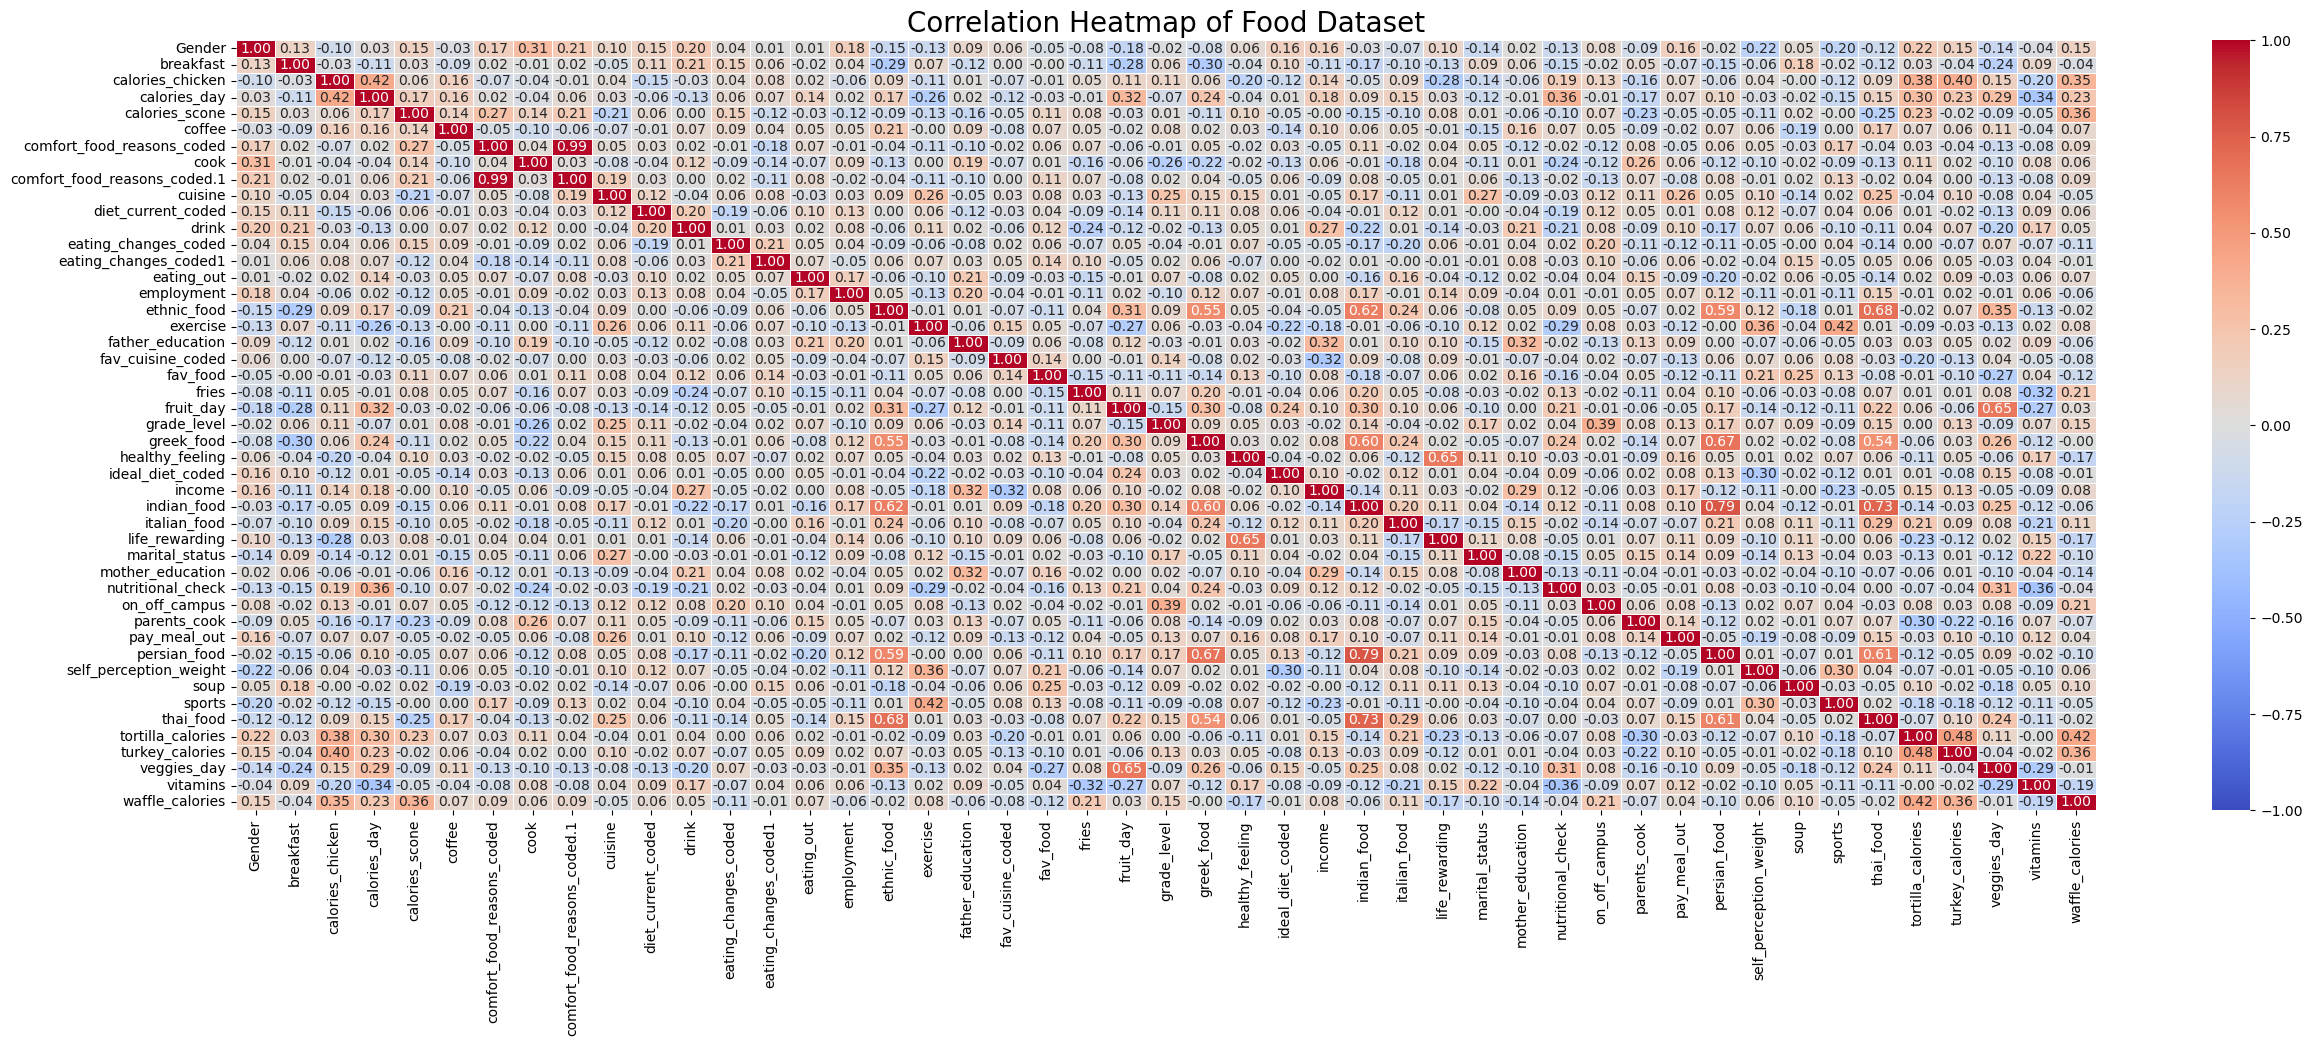

In [13]:
#9. Heat map

# Select only the numeric columns
numeric_columns = food.select_dtypes(include=['float64', 'int64'])

# Calculate the correlation matrix
correlation_matrix = numeric_columns.corr()

# Set up the matplotlib figure
plt.figure(figsize=(30, 10))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', vmin=-1, vmax=1, linewidths=0.5)

# Set the title
plt.title('Correlation Heatmap of Food Dataset', size=20)

# Show the plot
plt.show()


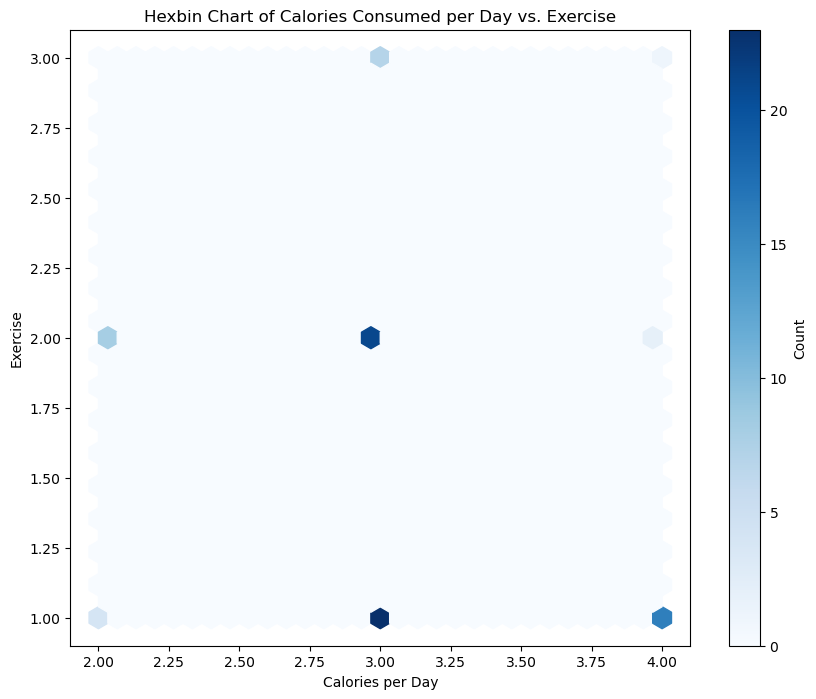

In [43]:
# 10. hexbin plot

# Drop rows with missing values in the selected columns
subset = food[['calories_day', 'exercise']].dropna()

# Create the hexbin plot
plt.figure(figsize=(10, 8))
plt.hexbin(subset['calories_day'], subset['exercise'], gridsize=30, cmap='Blues')

# Add color bar
plt.colorbar(label='Count')

# Set titles and labels
plt.title('Hexbin Chart of Calories Consumed per Day vs. Exercise')
plt.xlabel('Calories per Day')
plt.ylabel('Exercise')

# Show plot
plt.show()